In [82]:
import pandas as pd
import numpy as np
import patsy
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_regression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
flower_df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width",
"Petal Length", "Petal Width",
"Name"])
flower_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1.1 Clustering Data with k-Means

Task 1. Plot a scatter plot matrix between all features (see pandas.plotting.scatter matrix).
Use the “Name” column to color the points. Note that you may have to convert the
“Name” column into integers to use it for specifying the plot colors (see the ‘c’ parame-
ter). Resize the plot as needed. Do the three classes appear to be equally well-separated
or is one more different than the others?

Answer:\
The Best Classified Groups: eg.(x=petal length, y=petal width) 3 categories are clearly separated \
Modest Group: eg.(x=sepal width, y=petal length), with some overlappings of the category 1 and 2 \
Not So Good Group: eg. (x=sepal width, y=sepal length), with a lot overlappings of the category 1 and 2

In [3]:
flower_df.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
Name_dict = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica": 2
}

In [5]:
flower_df.loc[:,'Name'] = [Name_dict[x] for x in flower_df['Name']]


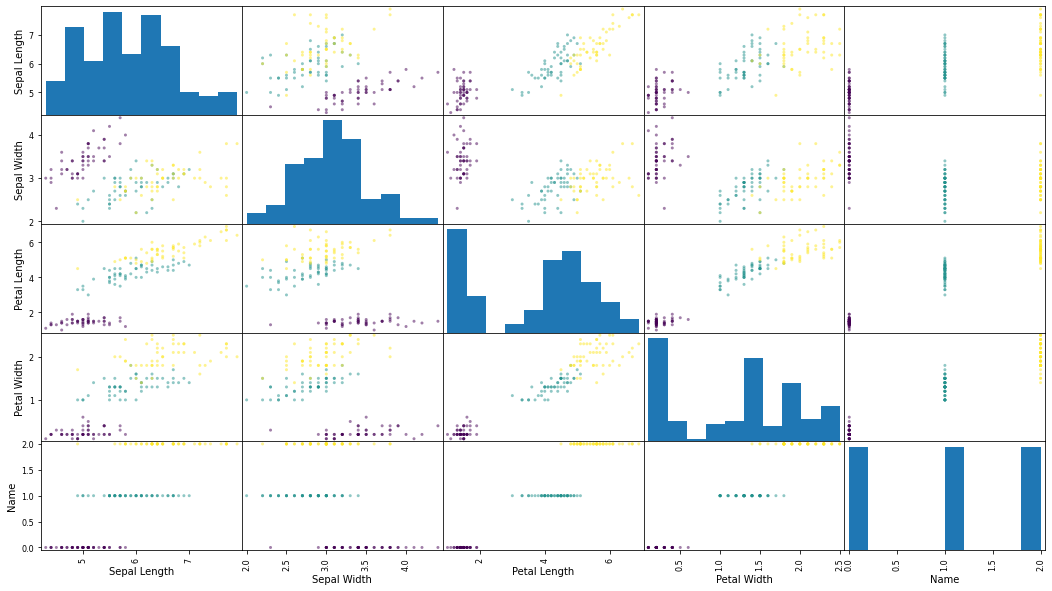

In [6]:
pd.plotting.scatter_matrix(flower_df, alpha=0.5, c=flower_df.Name, figsize=(18,10));

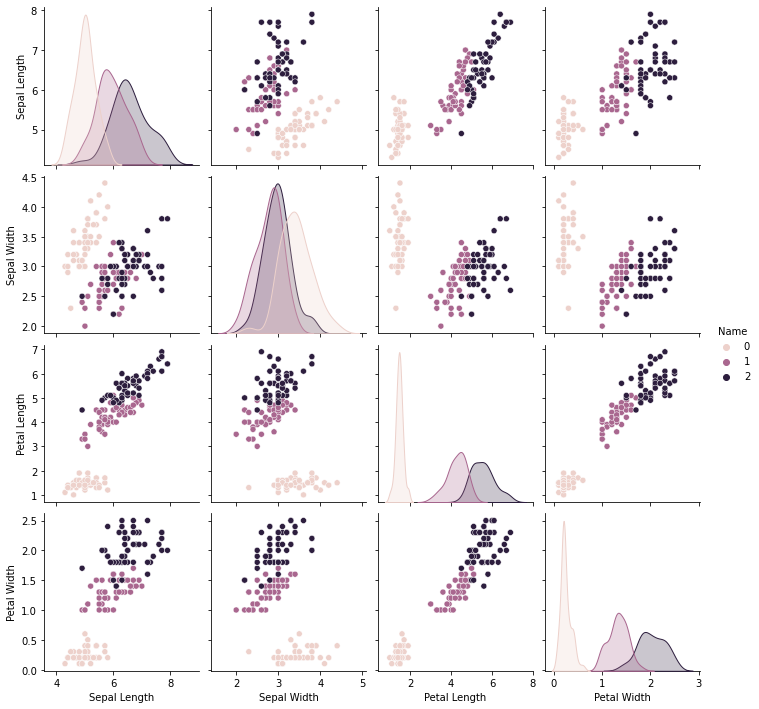

In [7]:
sns.pairplot(flower_df, hue='Name') 

Task 2. Cluster the the data using k-Means clustering (see sklearn.cluster.KMeans). Form
3 clusters (n clusters=3), with the four features as the input data, and plot the resulting
clusters as a 2D scatter plot. Use “Petal Length” for the x-axis of the plot and “Petal
Width” for the y-axis, with each point colored according to its assigned cluster label.

In [8]:
flower_features_df = flower_df.iloc[:,:-1]
flower_features_df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


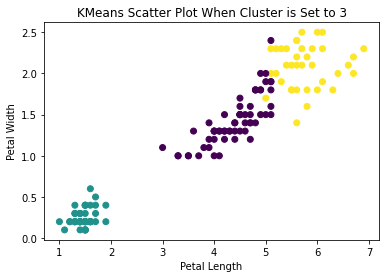

In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(flower_features_df, flower_df.Name)
kmeans.predict(flower_features_df)
plt.scatter(flower_df.iloc[:,2], flower_df.iloc[:,3], c=kmeans.labels_)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title("KMeans Scatter Plot When Cluster is Set to 3")
plt.show()


[Text(0.5, 1.0, 'KMeans Scatter Plot When Cluster is Set to 3')]

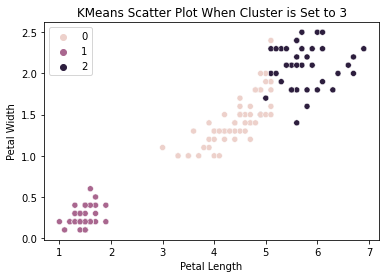

In [56]:
sns.scatterplot(x=flower_df.iloc[:,2], y=flower_df.iloc[:,3], hue=kmeans.labels_, data=flower_features_df).set(title ="KMeans Scatter Plot When Cluster is Set to 3")

In [43]:
flower_accuracy = accuracy_score(flower_df.Name, kmeans.labels_)
flower_accuracy

0.8933333333333333

Task 3. Show the cross-tabulation (see pandas.crosstab) of the actual class values and the
cluster labels. How many instances belong to an incorrect cluster? Do any of the cluster
labels correspond perfectly to a class label? Do these observations agree with what you
observed from the scatter plot matrix?

Answer:
Based on the Cross-tabulation results, cluster 0 (setosa) has the perfect class label. \
Cluster 1(versicolor) has really good cluster with 48 correct labels, Cluster 2 (Verginica) has less acurate prediction with 36 correct labels. Cross-tabulation results are compatible with the scatter plot shown above that clealy separate cluster 0 with overlappings in clusters 1 and 2.


In [36]:
pd.crosstab(flower_df.Name, kmeans.labels_)

col_0,0,1,2
Name,,,
0,50,0,0
1,0,48,2
2,0,14,36


## 1.2 Hierarchical Clustering of Features

Task 1. To assess how similar the features are, calculate the mutual information between
all pairs of features (see sklearn.feature selection.mutual info regression); that is, use each
feature as the target variable once in the calculation. Create a DataFrame from the output
and label the indices and columns of the DataFrame with the appropriate feature names.

In [99]:
flower_features_df.columns.values.tolist()

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [113]:

mutual_info_list = []
for i in range(len(flower_features_df.columns)):
    X = flower_features_df
    y = flower_features_df.iloc[:,i]
    mutual_info = mutual_info_regression(X, y)
    mutual_info_list.append(mutual_info)

    
flower_features_list = flower_features_df.columns.values.tolist()
mutual_info_df = pd.DataFrame(mutual_info_list)
mutual_info_df = mutual_info_df.set_axis(flower_features_list, axis=1)
mutual_info_df

# mutual_info_df = pd.DataFrame(mutual_info, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
# mutual_info_df
# mutual_info_df = pd.DataFrame({"Flower_features" : flower_features_list, "Mutual_Info" : mutual_info_list})
# # mutual_info_df = mutual_info_df.T
# mutual_info_df.T

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,3.202908,0.272463,0.853558,0.633185
1,0.263584,2.687703,0.350754,0.384228
2,0.878306,0.337465,3.194802,1.193617
3,0.627891,0.439855,1.203311,2.679822


Task 2. Create a dendrogram from the mutual information DataFrame. According to the
dendrogram, which pair of features is most similar? Which feature is most unlike the
others? You may use the following function to generate the dendrogram, which takes as
input the fit cluster model; you can pass the feature names with the labels parameter.

Answer:\
The best pair of fetures is (petal length, petal width) equivalent to (petal width, petal length)\
The most unlikely grouped featurs is (sepal width, petal length) equivalent to (petal length, sepal width)



In [114]:
# num_species = mutual_info_df['Flower_features'].nunique()
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(mutual_info_df)

In [115]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+1
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

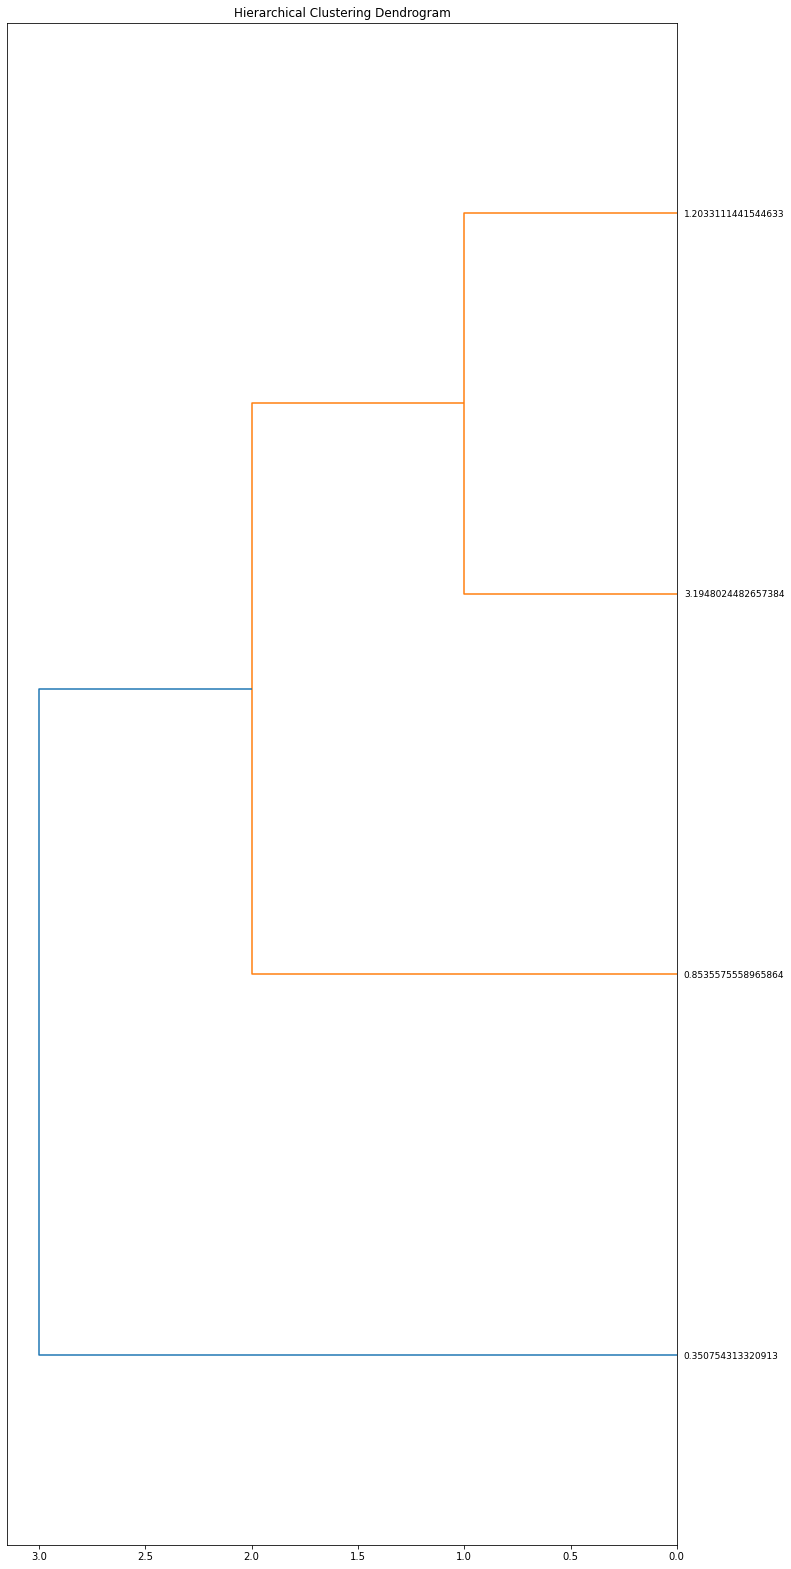

In [124]:
figure = plt.figure(figsize=(12, 28))
labels = mutual_info_df['Petal Length'].values
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=labels, orientation='left', leaf_font_size=9)
plt.show()